# Scaling Data
Many unsupervised machine learning algorithms are sensitive to the scale of the data. This means that the performance of the algorithm can be affected by the range of values in each feature. For example, if one feature has a much larger range of values than another feature, the distances attributed to it will be larger and it can therefore dominate the algorithm, even if this feature is less important to the outcome than others.

There are two main reasons why it is important to scale data for unsupervised learning:

- To ensure that all features have equal importance. If some features are on a much larger scale than others, then those features will dominate the algorithm and the other features will have little to no impact. Scaling the data ensures that all features are treated equally.
- To improve the convergence of the algorithm. Many unsupervised learning algorithms are iterative, meaning that they repeatedly update their parameters until they converge to a solution. Scaling the data can help the algorithm to converge more quickly and efficiently.

To exemplify why scaling matters, we're going to import all of the food preferences once again, but this time include the column `age` - that way not everything is in the same 1-10 scale.

---
##1.&nbsp; Import libraries and files 💾

In [2]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [3]:
# Get the spreadsheet ID and name
# ID of the Google Sheet for student food preferences
sheet_id = "1cQvzlF8bXEx7tpBlInpYmVaUtCvZuDnBTjhlejtUT_0"

# Title of the Google Sheet
sheet_name = "0"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"


# Create a Pandas DataFrame from the CSV data
foods_df = pd.read_csv(url,
                       index_col="student",
                       nrows=17)


# Drop the `favorite_color` column - why can't we use the string "blue" for unsupervised ML?
foods_df = foods_df.drop(columns="favorite_color")

---
##2.&nbsp; Explore the data 👩‍🚀

In [4]:
foods_df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Christian,10,5,5,0,8,10,7,5,9,24
Florian,9,7,2,0,3,5,0,0,5,29
Hajer,2,4,1,6,5,5,10,0,0,25
Hans,5,0,0,0,0,7,8,7,0,30
Ikbel,9,5,4,0,4,7,10,5,0,25
Imen,5,3,5,0,0,8,10,0,0,30
Jan,10,10,1,1,1,7,10,10,10,36
Lawrence,8,8,8,7,8,7,10,10,10,30
Marina,8,0,9,6,0,10,10,10,3,29


Let's quickly recreate our heatmap from the last lesson where age was not involved and everything was scaled between 1-10. We'll compare it to a heatmap where age is involved and therefore everything isn't in the range of 1-10.

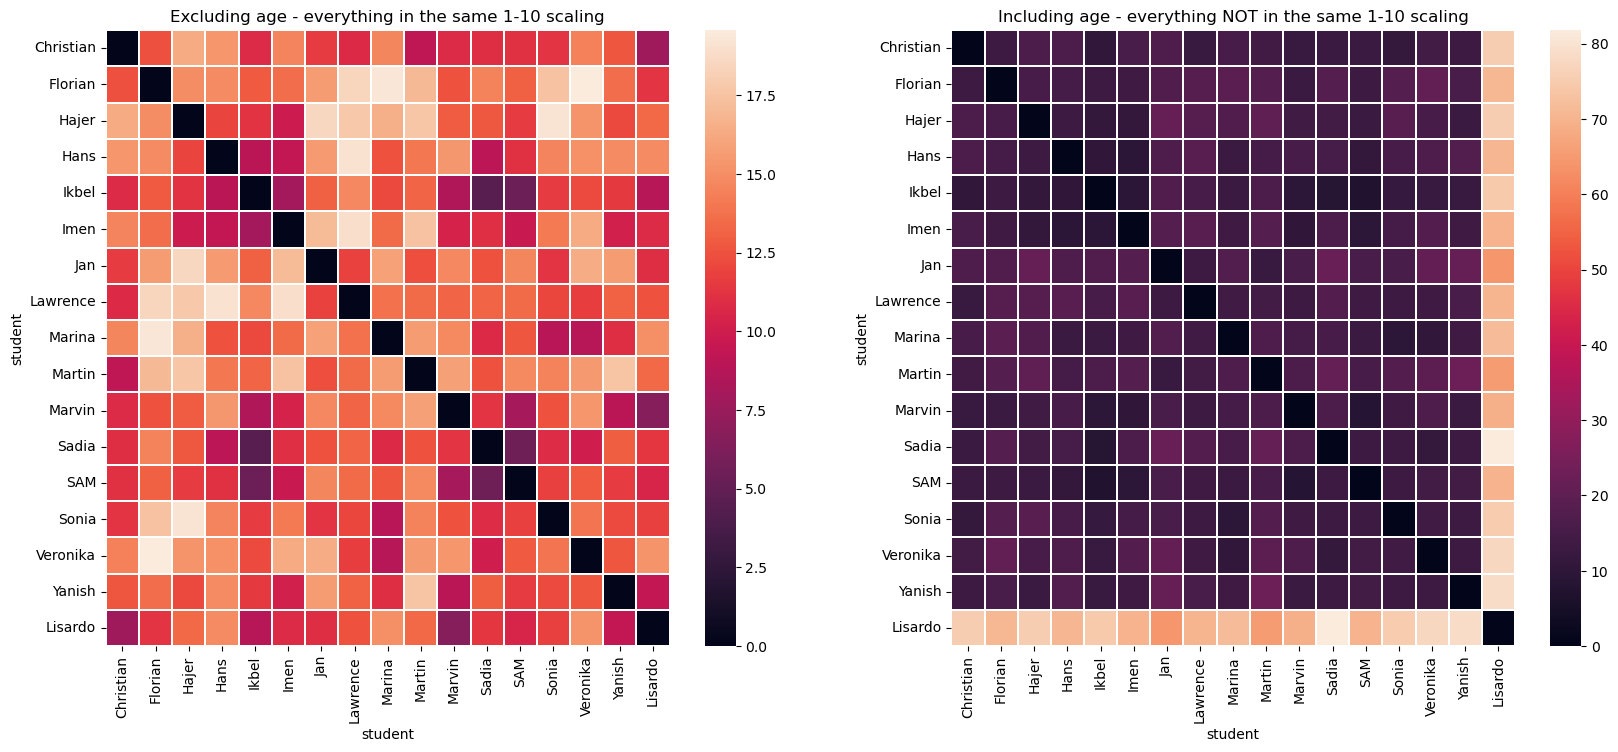

In [5]:
# Making the DataFrame for the heatmap excluding age
no_age_df = foods_df.drop(columns='age').copy()
no_age_distances_df = pd.DataFrame(pairwise_distances(no_age_df),
                                   index=no_age_df.index,
                                   columns=no_age_df.index)

# Making the DataFrame for the heatmap including age
with_age_distances_df = pd.DataFrame(pairwise_distances(foods_df),
                                     index=foods_df.index,
                                     columns=foods_df.index)
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
 
# Plotting the two plots
sns.heatmap(no_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_distances_df, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Excluding age - everything in the same 1-10 scaling')
ax2.set_title('Including age - everything NOT in the same 1-10 scaling')

plt.show()


The age feature is dominating the distance calculation and obscuring the food preferences. We need to scale the data so that all features have equal importance.

---
##3.&nbsp; Scalers - changing the range, but not the distribution 🎚️
When we scale with SKLearn we get the choice to use a variety of scalers. Scalers do not change the distribution of the data, they change the range of the data.

> **Remember:** Range = Max - Min

###3.1.&nbsp; Min and Max Scaling
All columns get scaled between 0 and 1. The lowest value of a column becomes 0, the highest value of a column becomes 1, and all other values get scaled in between.

\begin{align}
newValue = \frac{oldValue - min(column)}{max(column) - min(column)}
    \end{align}

Let's apply Min Max scaling to the whole DataFrame:

In [6]:
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas") # If you want to explore set_output further https://blog.scikit-learn.org/technical/pandas-dataframe-output-for-sklearn-transformer/

# Scale the foods_df DataFrame
with_age_minmax = scaler.fit_transform(foods_df)
with_age_minmax

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Christian,1.000,0.5,0.5,0.0,1.000,1.000000,0.7,0.5,0.9,0.074074
Florian,0.875,0.7,0.2,0.0,0.375,0.166667,0.0,0.0,0.5,0.135802
Hajer,0.000,0.4,0.1,0.6,0.625,0.166667,1.0,0.0,0.0,0.086420
Hans,0.375,0.0,0.0,0.0,0.000,0.500000,0.8,0.7,0.0,0.148148
Ikbel,0.875,0.5,0.4,0.0,0.500,0.500000,1.0,0.5,0.0,0.086420
Imen,0.375,0.3,0.5,0.0,0.000,0.666667,1.0,0.0,0.0,0.148148
Jan,1.000,1.0,0.1,0.1,0.125,0.500000,1.0,1.0,1.0,0.222222
Lawrence,0.750,0.8,0.8,0.7,1.000,0.500000,1.0,1.0,1.0,0.148148
Marina,0.750,0.0,0.9,0.6,0.000,1.000000,1.0,1.0,0.3,0.135802


To exemplify the effects of Min-Max scaling, let's compare the original values of the age column to the scaled values.

In [7]:
# Display age column of original DataFrame and age column of MinMaxed DataFrame to compare
pd.DataFrame({
    'original': foods_df.iloc[:,-1],
    'min_max_scale': with_age_minmax.iloc[:,-1]
}).sort_values(by='original')

,original,min_max_scale
student,,
Sadia,18,0.000000
Yanish,21,0.037037
Veronika,23,0.061728
Christian,24,0.074074
Hajer,25,0.086420
Sonia,25,0.086420
Ikbel,25,0.086420
Marina,29,0.135802
Florian,29,0.135802


If we plot the original and MinMax-scaled ages below, we can see that MinMax scaling only affects the range of the data on the x-axis, not the shape of the distribution.

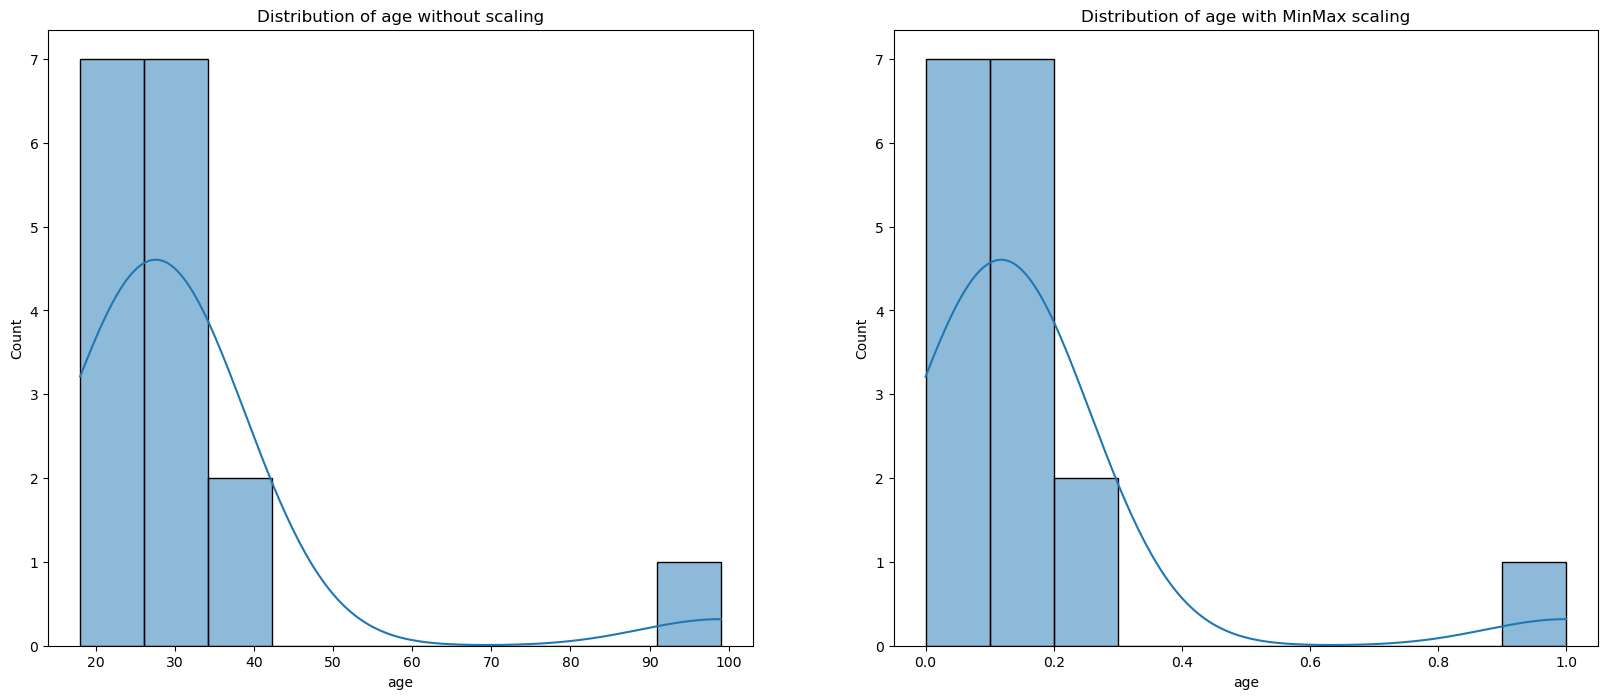

In [8]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=foods_df.iloc[:,-1], bins=10, kde=True, ax= ax1);
sns.histplot(with_age_minmax.iloc[:,-1], bins=10, kde=True, ax= ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with MinMax scaling')

plt.show()

Let's have a look at the affect MinMax scaling had on the heatmap

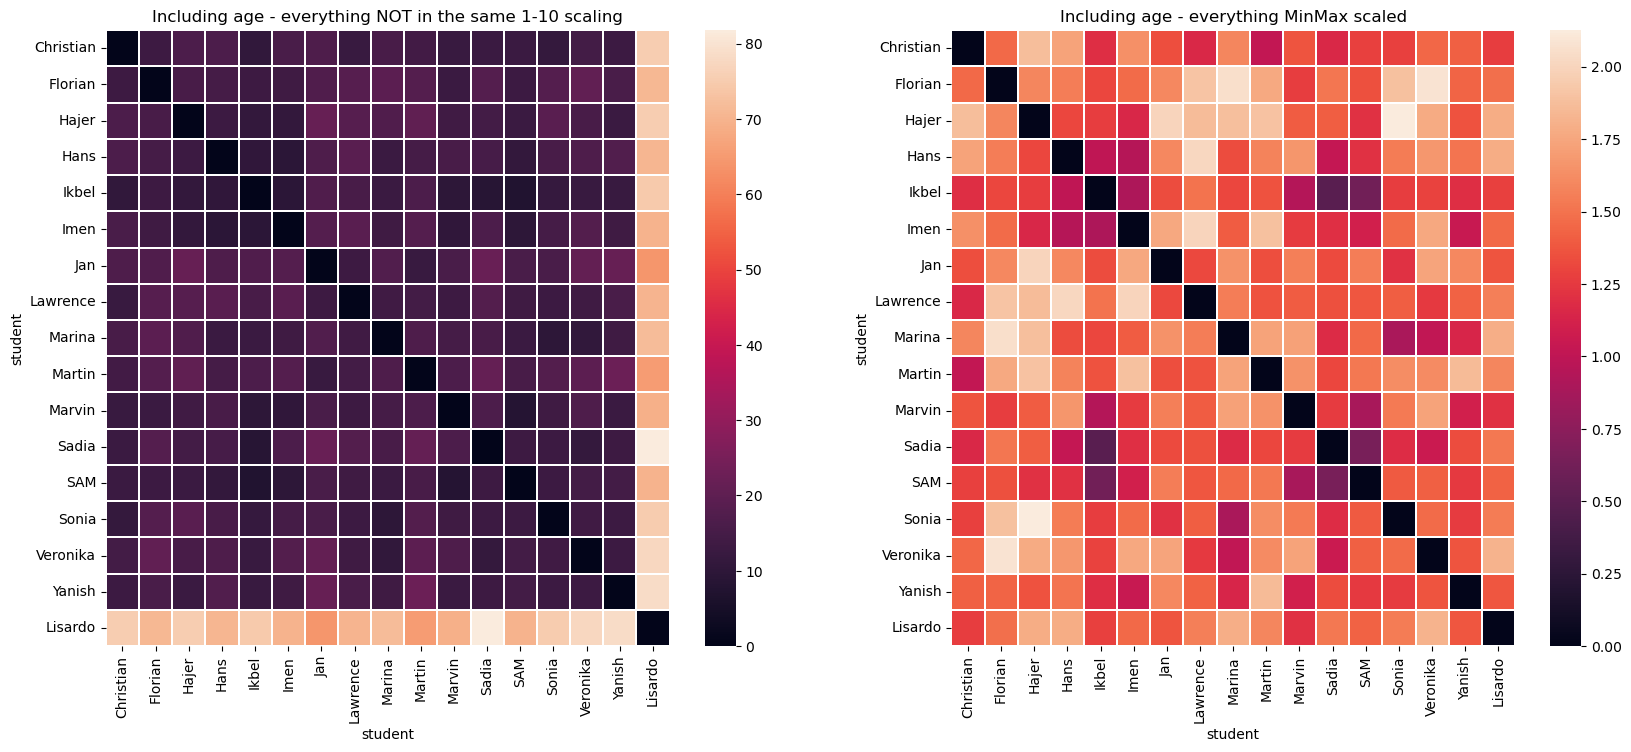

In [9]:
# Making the DataFrame for the MinMaxed heatmap
with_age_minmax_distances = pd.DataFrame(pairwise_distances(with_age_minmax),
                                         index=foods_df.index,
                                         columns=foods_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_minmax_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything MinMax scaled')

plt.show()

By scaling all features between 0 and 1, we prevent any feature with a much larger scale from having a much larger impact on our final output.

###3.2.&nbsp; Standard scaler

The StandardScaler scales all features according to the standard deviation of the feature. The standard deviation is equal to 1, and all other values are scaled accordingly. The data is also centered around 0, meaning that the mean becomes 0 and all values less than the mean are negative, while all values higher than the mean are positive.

\begin{align}
newValue = \frac{oldValue - mean(column)}{std(column)}
    \end{align}

Let's apply this to the whole DataFrame:

In [10]:
# Create a StandardScaler object
scaler = StandardScaler().set_output(transform="pandas")

# Scale the foods_df DataFrame
with_age_standard = scaler.fit_transform(foods_df)

with_age_standard



,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Christian,0.932091,0.083478,0.000000,-0.723338,1.470307,1.416130,-0.757677,-0.130394,1.237040,-0.442325
Florian,0.479361,0.793045,-0.921954,-0.723338,-0.265472,-1.383196,-3.666178,-1.361890,0.211202,-0.155320
Hajer,-2.689749,-0.271305,-1.229273,1.121174,0.428839,-1.383196,0.488824,-1.361890,-1.071096,-0.384924
Hans,-1.331559,-1.690437,-1.536591,-0.723338,-1.306939,-0.263466,-0.342177,0.362205,-1.071096,-0.097919
Ikbel,0.479361,0.083478,-0.307318,-0.723338,0.081684,-0.263466,0.488824,-0.130394,-1.071096,-0.384924
Imen,-1.331559,-0.626088,0.000000,-0.723338,-1.306939,0.296399,0.488824,-1.361890,-1.071096,-0.097919
Jan,0.932091,1.857394,-1.229273,-0.415919,-0.959783,-0.263466,0.488824,1.101102,1.493500,0.246487
Lawrence,0.026631,1.147828,0.921954,1.428592,1.470307,-0.263466,0.488824,1.101102,1.493500,-0.097919
Marina,0.026631,-1.690437,1.229273,1.121174,-1.306939,1.416130,0.488824,1.101102,-0.301717,-0.155320


To exemplify the effects of Standard scaling, let's compare the original values of the age column to the scaled values.

In [11]:
# Display age column of original DataFrame and age column of Standard DataFrame to compare
pd.DataFrame({
    'original': foods_df.iloc[:,-1],
    'standard_scale': with_age_standard.iloc[:,-1]
}).sort_values(by='original')

,original,standard_scale
student,,
Sadia,18,-0.786731
Yanish,21,-0.614528
Veronika,23,-0.499726
Christian,24,-0.442325
Hajer,25,-0.384924
Sonia,25,-0.384924
Ikbel,25,-0.384924
Marina,29,-0.155320
Florian,29,-0.155320


If we plot the original and Standard-scaled ages below, we can see that Standard scaling only affects the range of the data on the x-axis, not the shape of the distribution.

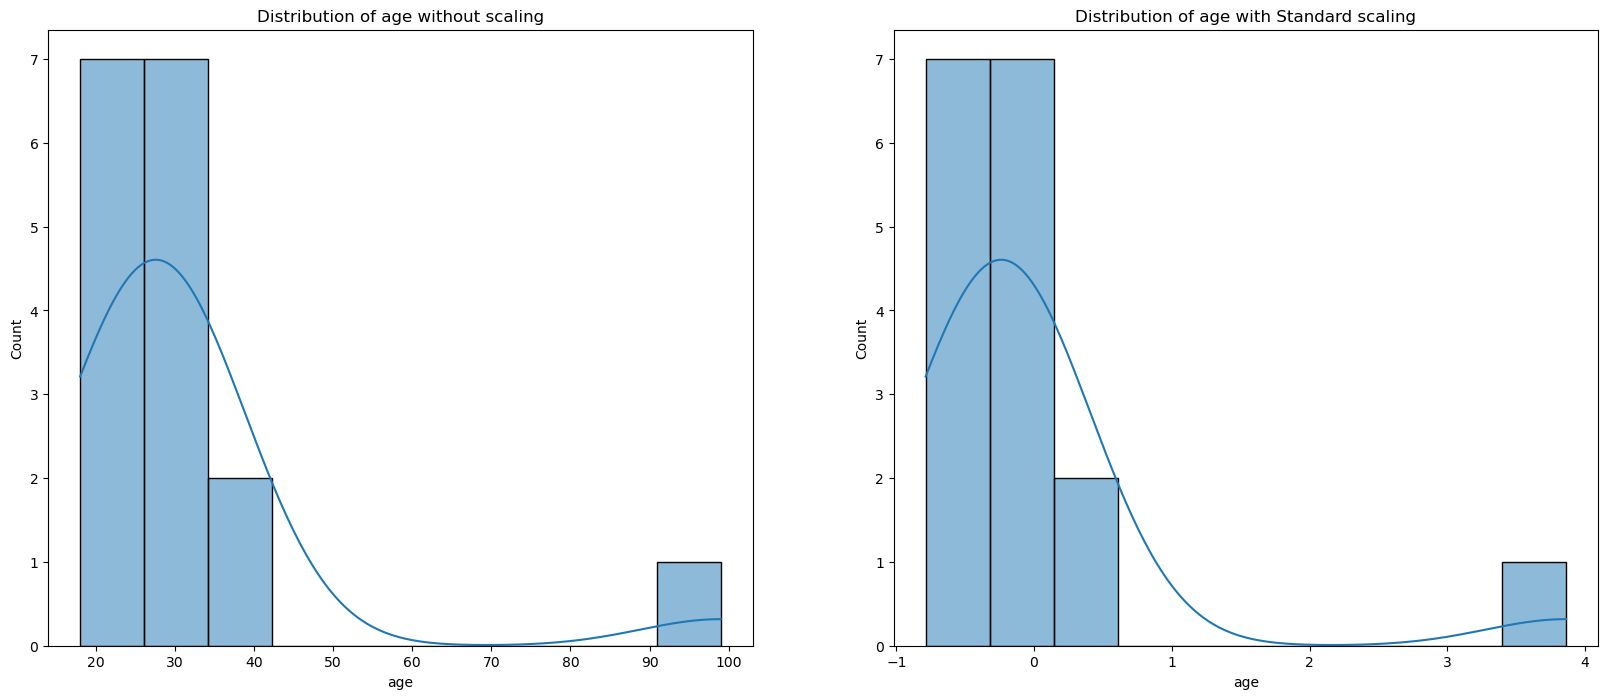

In [12]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=foods_df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(with_age_standard.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with Standard scaling')

plt.show()

Let's have a look at the affect Standard scaling had on the heatmap

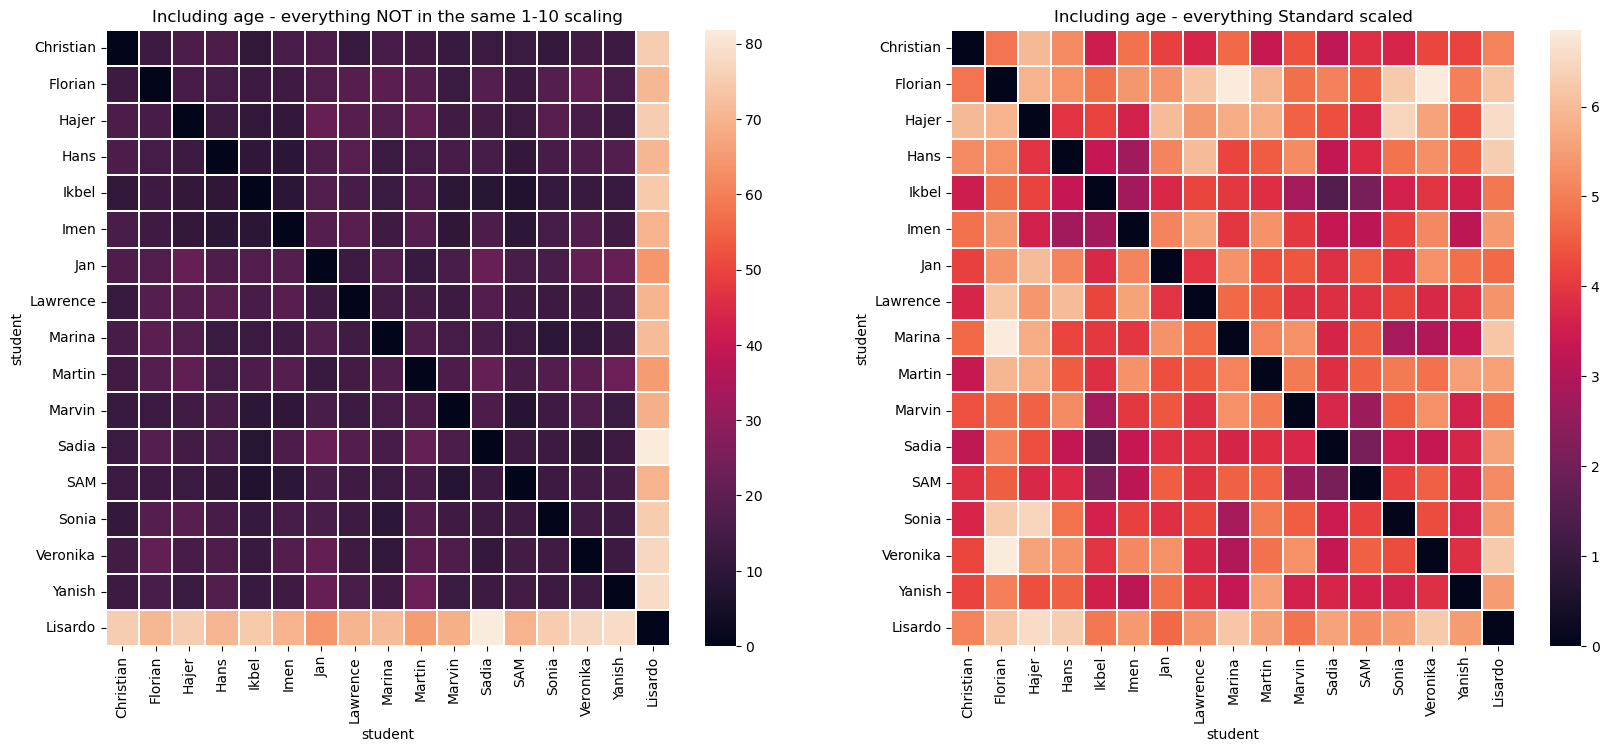

In [13]:
# Making the DataFrame for the Standard heatmap
with_age_standard_distances = pd.DataFrame(pairwise_distances(with_age_standard),
                                           index=foods_df.index,
                                           columns=foods_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_standard_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Standard scaled')

plt.show()

###3.3.&nbsp; Robust scaler

The RobustScaler scales all features between their interquartile ranges (IQRs). The IQR is the difference between the third quartile (Q3) and the first quartile (Q1) of the feature. The lowest value of the feature is scaled to Q1, the highest value of the feature is scaled to Q3, and all other values are scaled in between. The data is also centered around 0, meaning that the median becomes 0 and all values less than the median are negative, while all values higher than the median are positive.

\begin{align}
newValue = \frac{oldValue - median(column)}{IQR(column)}
      \end{align}

Let's apply this to the whole DataFrame:

In [14]:
# Create a RobustScaler object
scaler = RobustScaler().set_output(transform="pandas")

# Scale the foods_df DataFrame
with_age_robust = scaler.fit_transform(foods_df)

To exemplify the effects of Robust scaling, let's compare the original values of the age column to the scaled values.

In [15]:
# Display age column of original DataFrame and age column of Robust DataFrame to compare
pd.DataFrame({
    'original': foods_df.iloc[:,-1],
    'robust_scale': with_age_robust.iloc[:,-3]
}).sort_values(by='original')

,original,robust_scale
student,,
Sadia,18,0.333333
Yanish,21,-0.555556
Veronika,23,0.444444
Christian,24,-0.111111
Hajer,25,-0.666667
Sonia,25,0.444444
Ikbel,25,-0.111111
Marina,29,0.444444
Florian,29,-0.666667


If we plot the original and Robust-scaled ages below, we can see that Robust scaling only affects the range of the data on the x-axis, not the shape of the distribution.

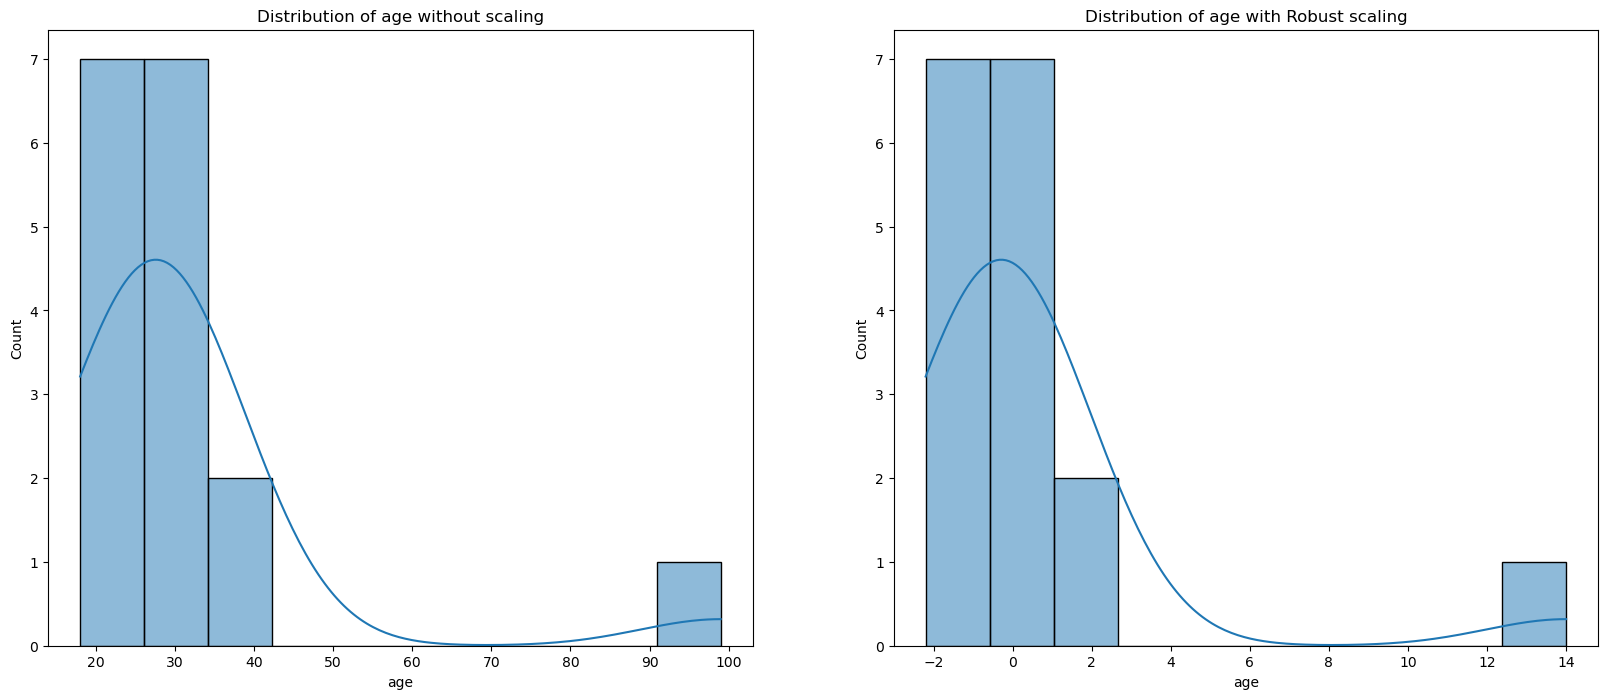

In [16]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=foods_df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(with_age_robust.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with Robust scaling')

plt.show()

Let's have a look at the affect Robust scaling had on the heatmap

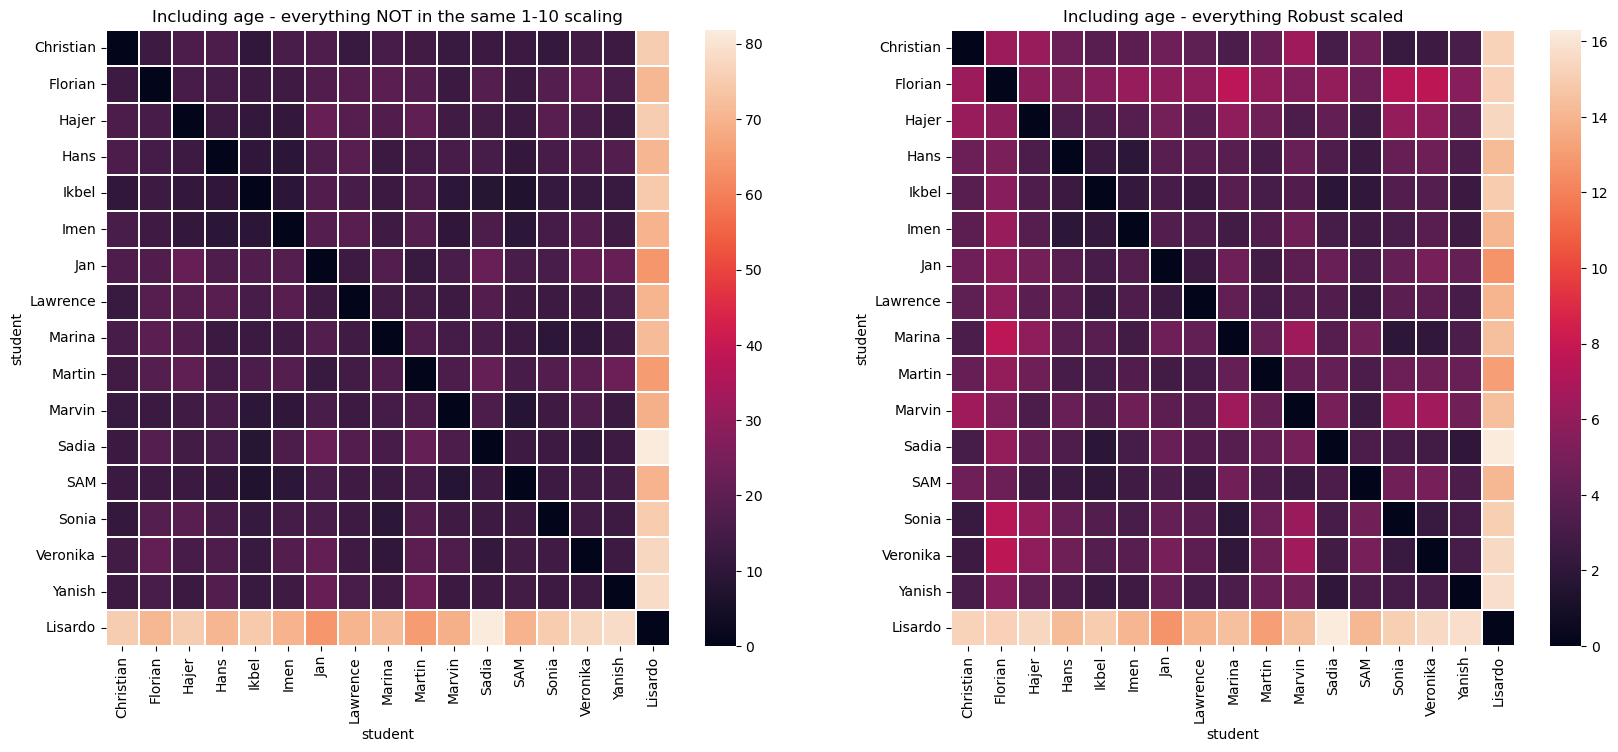

In [17]:
# Making the DataFrame for the Robust heatmap
with_age_robust_distances = pd.DataFrame(pairwise_distances(with_age_robust),
                                         index=foods_df.index,
                                         columns=foods_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_robust_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Robust scaled')

plt.show()

The robust scaler can often be a good idea, it's designed to help against outliers affecting the data by using the interquartile range instead of the full range (like the minmax scaler). Unfortunately, here it hasn't helped much because the interquartile range of the age column is so much larger than the interquartile range of any other column, and therefore the age column still distorts our concept of similarity (distance).

---
##4.&nbsp; Transformers - changing the range and the distribution 🎛️
Transformers change the distribution to more closely resemble a normal distribution. Data that conforms to the normal distribution in machine learning is advantageous for model construction since it simplifies the maths. The assumption that the distribution is normal is explicitly used in the calculations for models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc.

###4.1.&nbsp; Quantile transformer

All of the columns get scaled according to their [quantile](https://en.wikipedia.org/wiki/Quantile).

> **Note:** Quantiles are divisions of data that tell us how much of the data is present below a certain point. For example, the median is the middle value in a dataset, so it is a quantile of 0.5, meaning that half of the data exists at or below the median. Similarly, 78% of the data exists at or below the quantile 0.78.

Let's apply this to the whole DataFrame:

In [18]:
# Number of samples
number_of_samples = foods_df.shape[0]
print(number_of_samples)
# Create a QuantileTransformer object
scaler = QuantileTransformer(n_quantiles = number_of_samples).set_output(transform="pandas")

# Transform the foods_df DataFrame
with_age_quantile = scaler.fit_transform(foods_df)

17


To exemplify the effects of Quantile transformation, let's compare the original values of the age column to the transformed values.

In [19]:
# Display age column of original DataFrame and age column of Quantile DataFrame to compare
pd.DataFrame({
    'original': foods_df.iloc[:,-1],
    'quantile_transformed': with_age_quantile.iloc[:,-1]
}).sort_values(by='original')

,original,quantile_transformed
student,,
Sadia,18,0.00000
Yanish,21,0.06250
Veronika,23,0.12500
Christian,24,0.18750
Hajer,25,0.31250
Sonia,25,0.31250
Ikbel,25,0.31250
Marina,29,0.46875
Florian,29,0.46875


If we plot the original and Quantile transformed ages below, we can see that Quantile transforming not only affects the range of the data on the x-axis, but the shape of the distribution too.

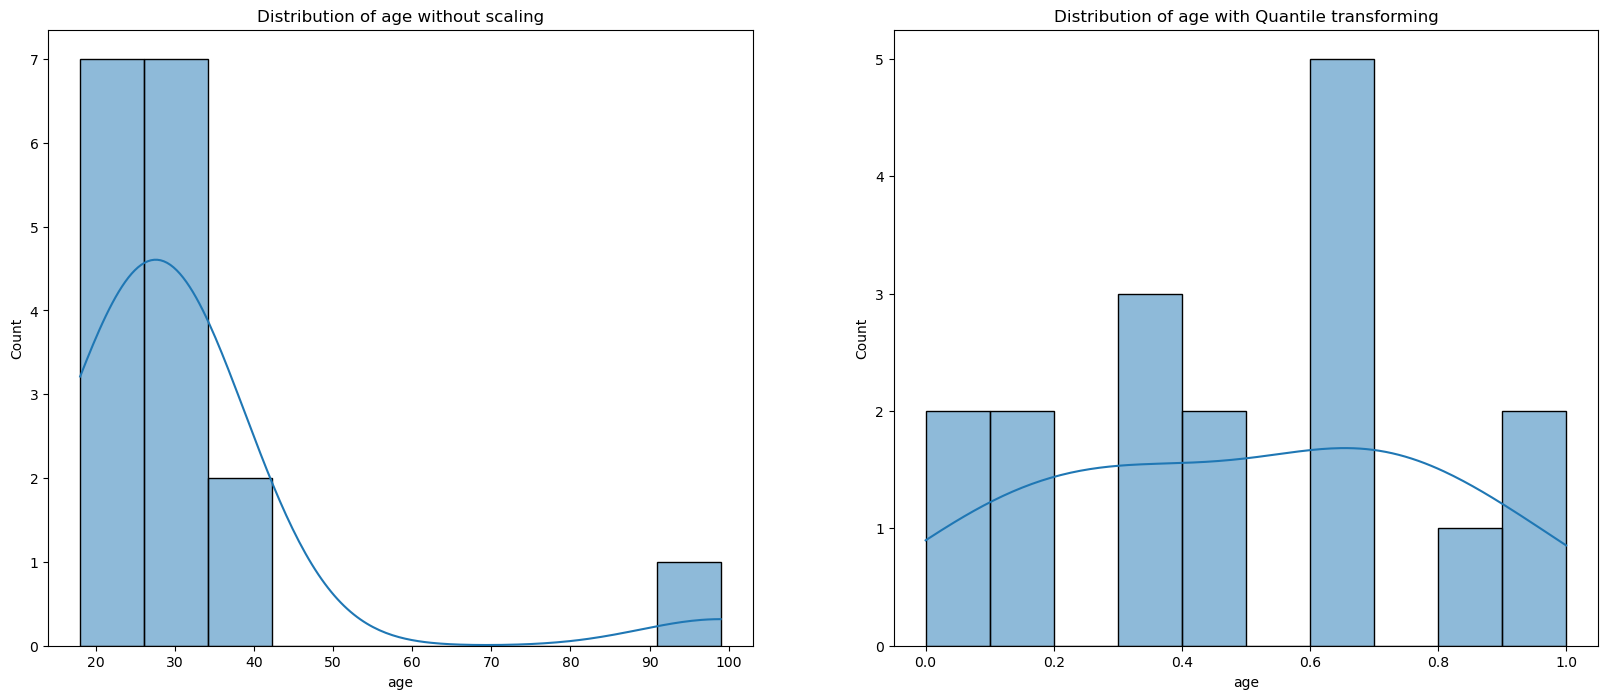

In [20]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=foods_df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(with_age_quantile.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with Quantile transforming')

plt.show()

Let's have a look at the affect Quantile transformation had on the heatmap

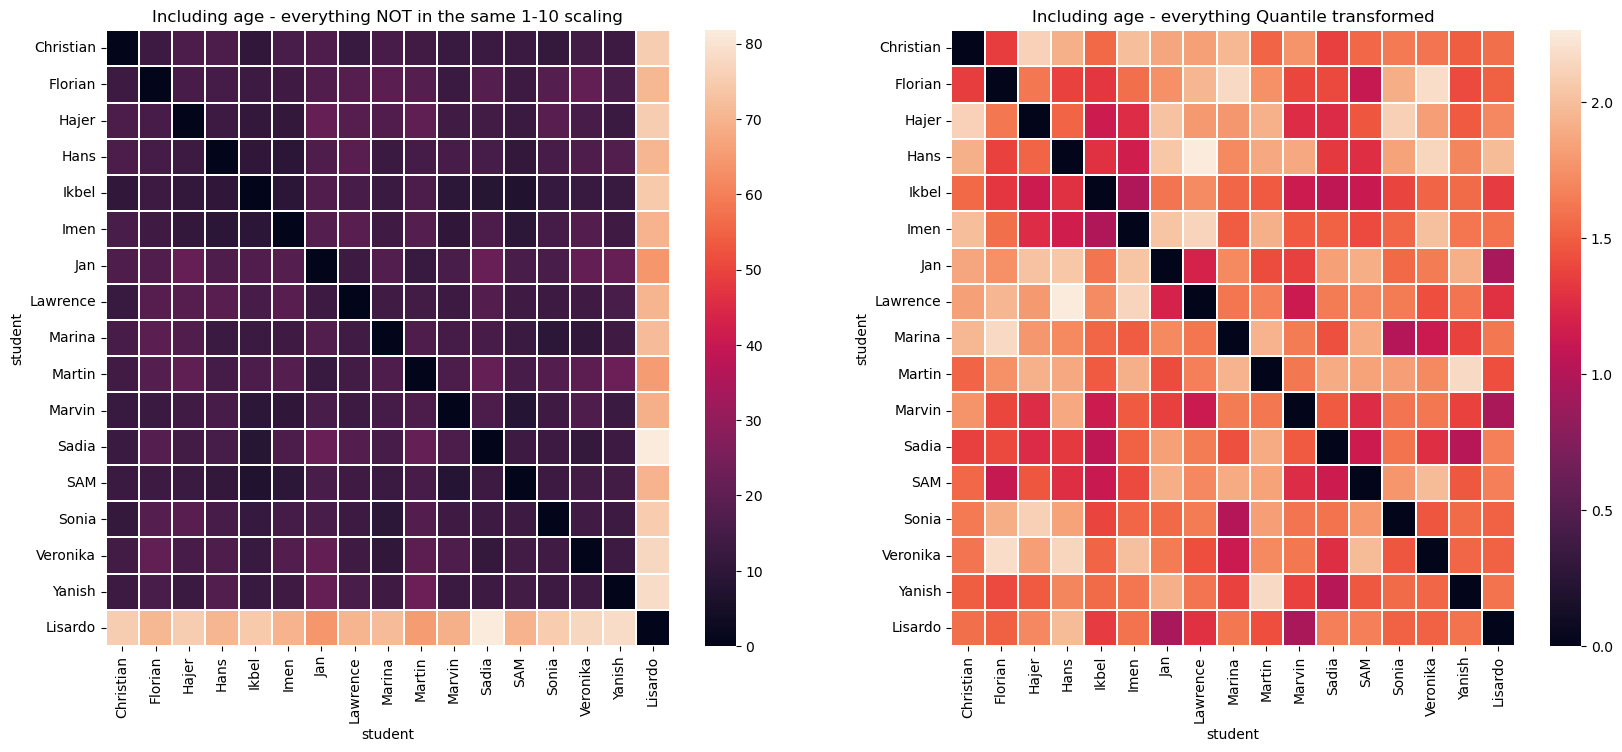

In [21]:
# Making the DataFrame for the Quantile heatmap
with_age_quantile_distances = pd.DataFrame(pairwise_distances(with_age_quantile),
                                           index=foods_df.index,
                                           columns=foods_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_quantile_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Quantile transformed')

plt.show()

###4.2.&nbsp; Power transformer

Power transformers transform the data via [power functions](https://en.wikipedia.org/wiki/Power_transform). They can use either the Yeo-Johnson transformation, or the Box-Cox transformation. You don't need to understand the maths behind this one, just know that it reshapes the data to more closely resemble the normal distribution.

Let's apply this to the whole DataFrame:

In [22]:
# Create a PowerTransformer object
scaler = PowerTransformer().set_output(transform="pandas")
"""
In this notebook we use the inline version of .set_output(transform="pandas")
Instead of the universal:
  from sklearn import set_config
  set_config(transform_output = "pandas")

This is because of a known bug when using the universal version with power transformer
https://github.com/scikit-learn/scikit-learn/issues/26443
"""

# Transform the foods_df DataFrame
with_age_power = scaler.fit_transform(foods_df)

To exemplify the effects of Power transformation, let's compare the original values of the age column to the transformed values.

In [23]:
# Display 1st column of original DataFrame and 1st column of Power transformed DataFrame to compare
pd.DataFrame({
    'original': foods_df.iloc[:,-1],
    'power_transformed': with_age_power.iloc[:,-1]
}).sort_values(by='original')

,original,power_transformed
student,,
Sadia,18,-2.384651
Yanish,21,-1.340496
Veronika,23,-0.823505
Christian,24,-0.603818
Hajer,25,-0.405367
Sonia,25,-0.405367
Ikbel,25,-0.405367
Marina,29,0.225051
Florian,29,0.225051


If we plot the original and Power transformed ages below, we can see that Power transforming not only affects the range of the data on the x-axis, but the shape of the distribution too.

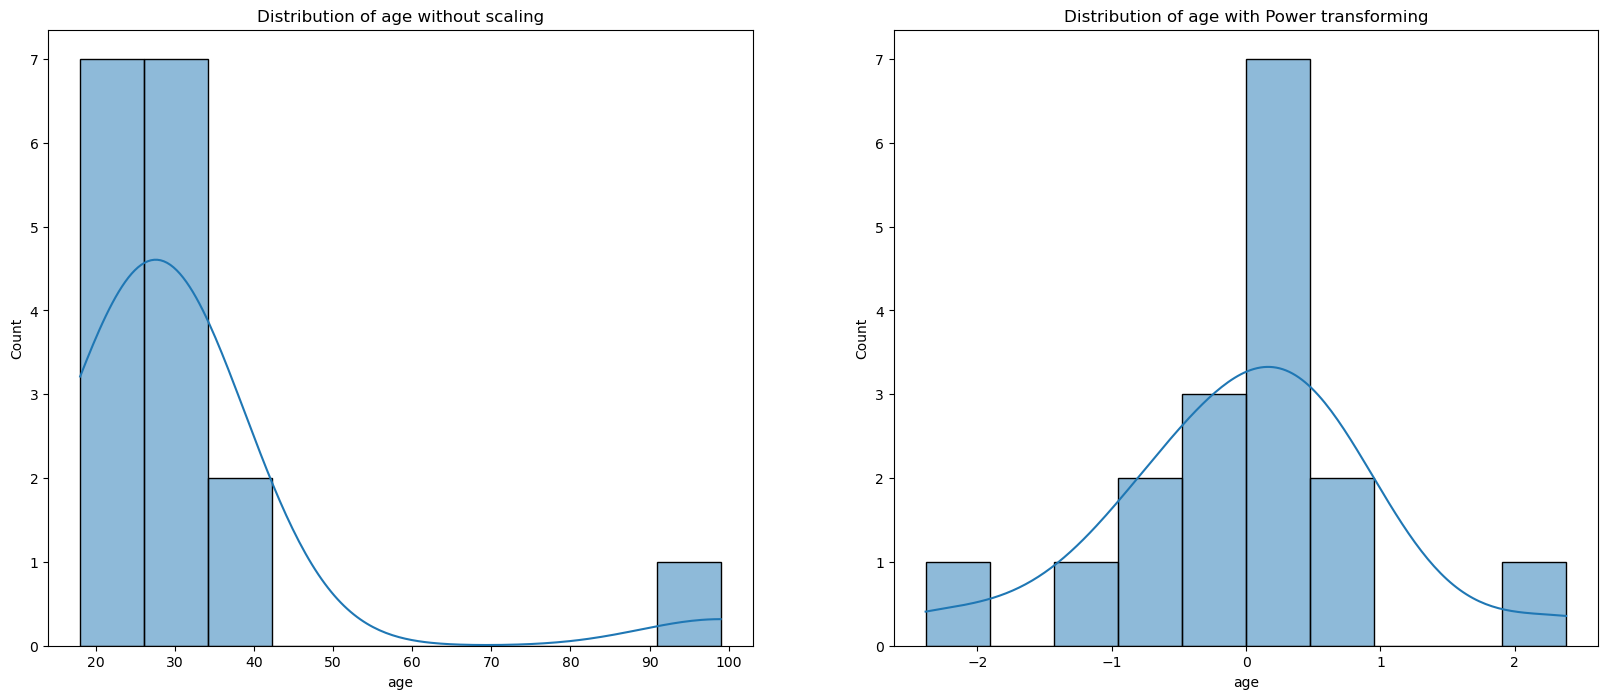

In [24]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=foods_df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(data=with_age_power.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with Power transforming')

plt.show()

Let's have a look at the affect Power transformation had on the heatmap

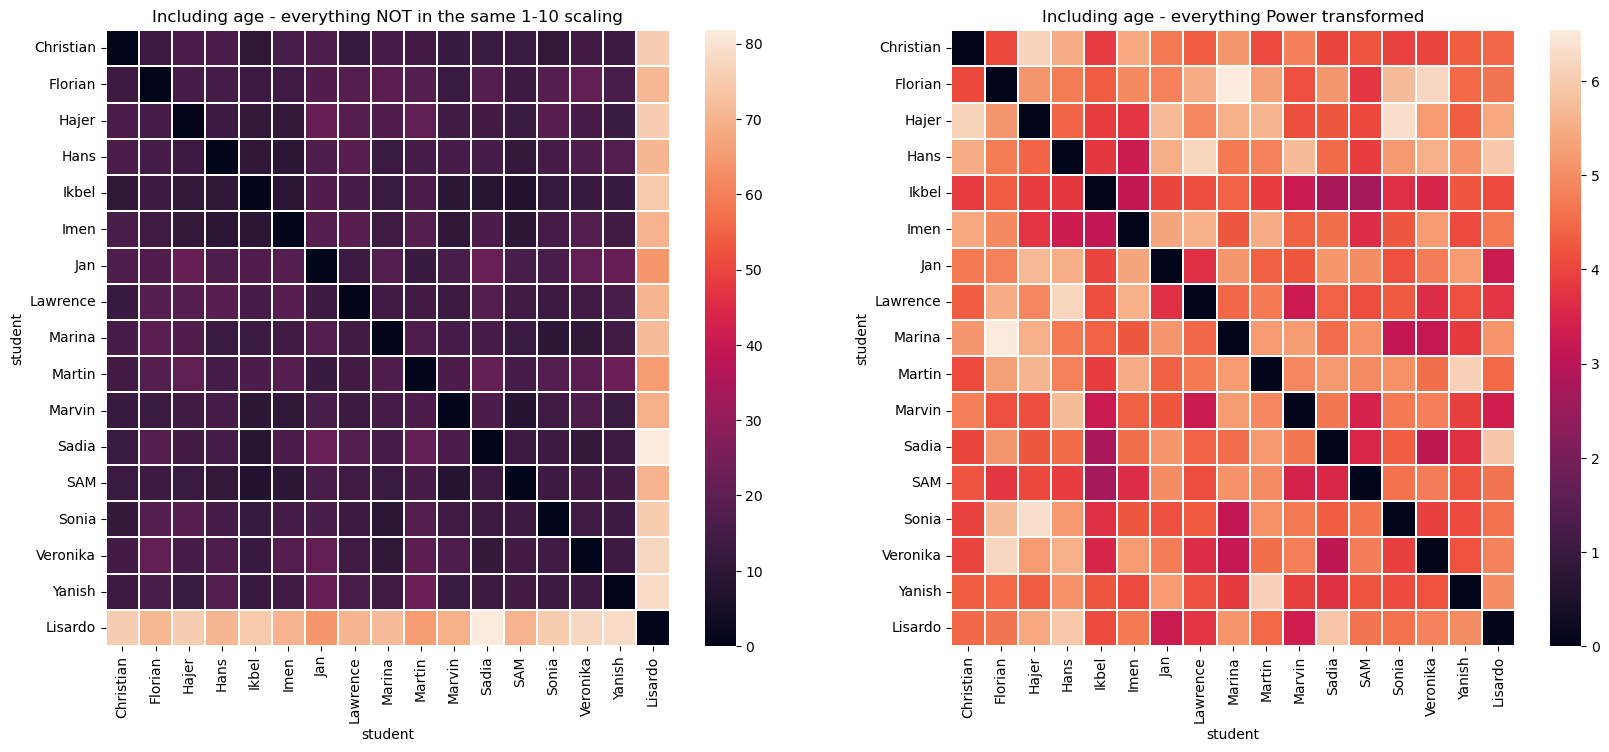

In [25]:
# Making the DataFrame for the Power heatmap
with_age_power_distances = pd.DataFrame(pairwise_distances(with_age_power),
                                        index=foods_df.index,
                                        columns=foods_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_power_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Power transformed')

plt.show()

---
##5.&nbsp; Comparing all 6 options 🔍

###5.1.&nbsp; All 6 histograms for comparison

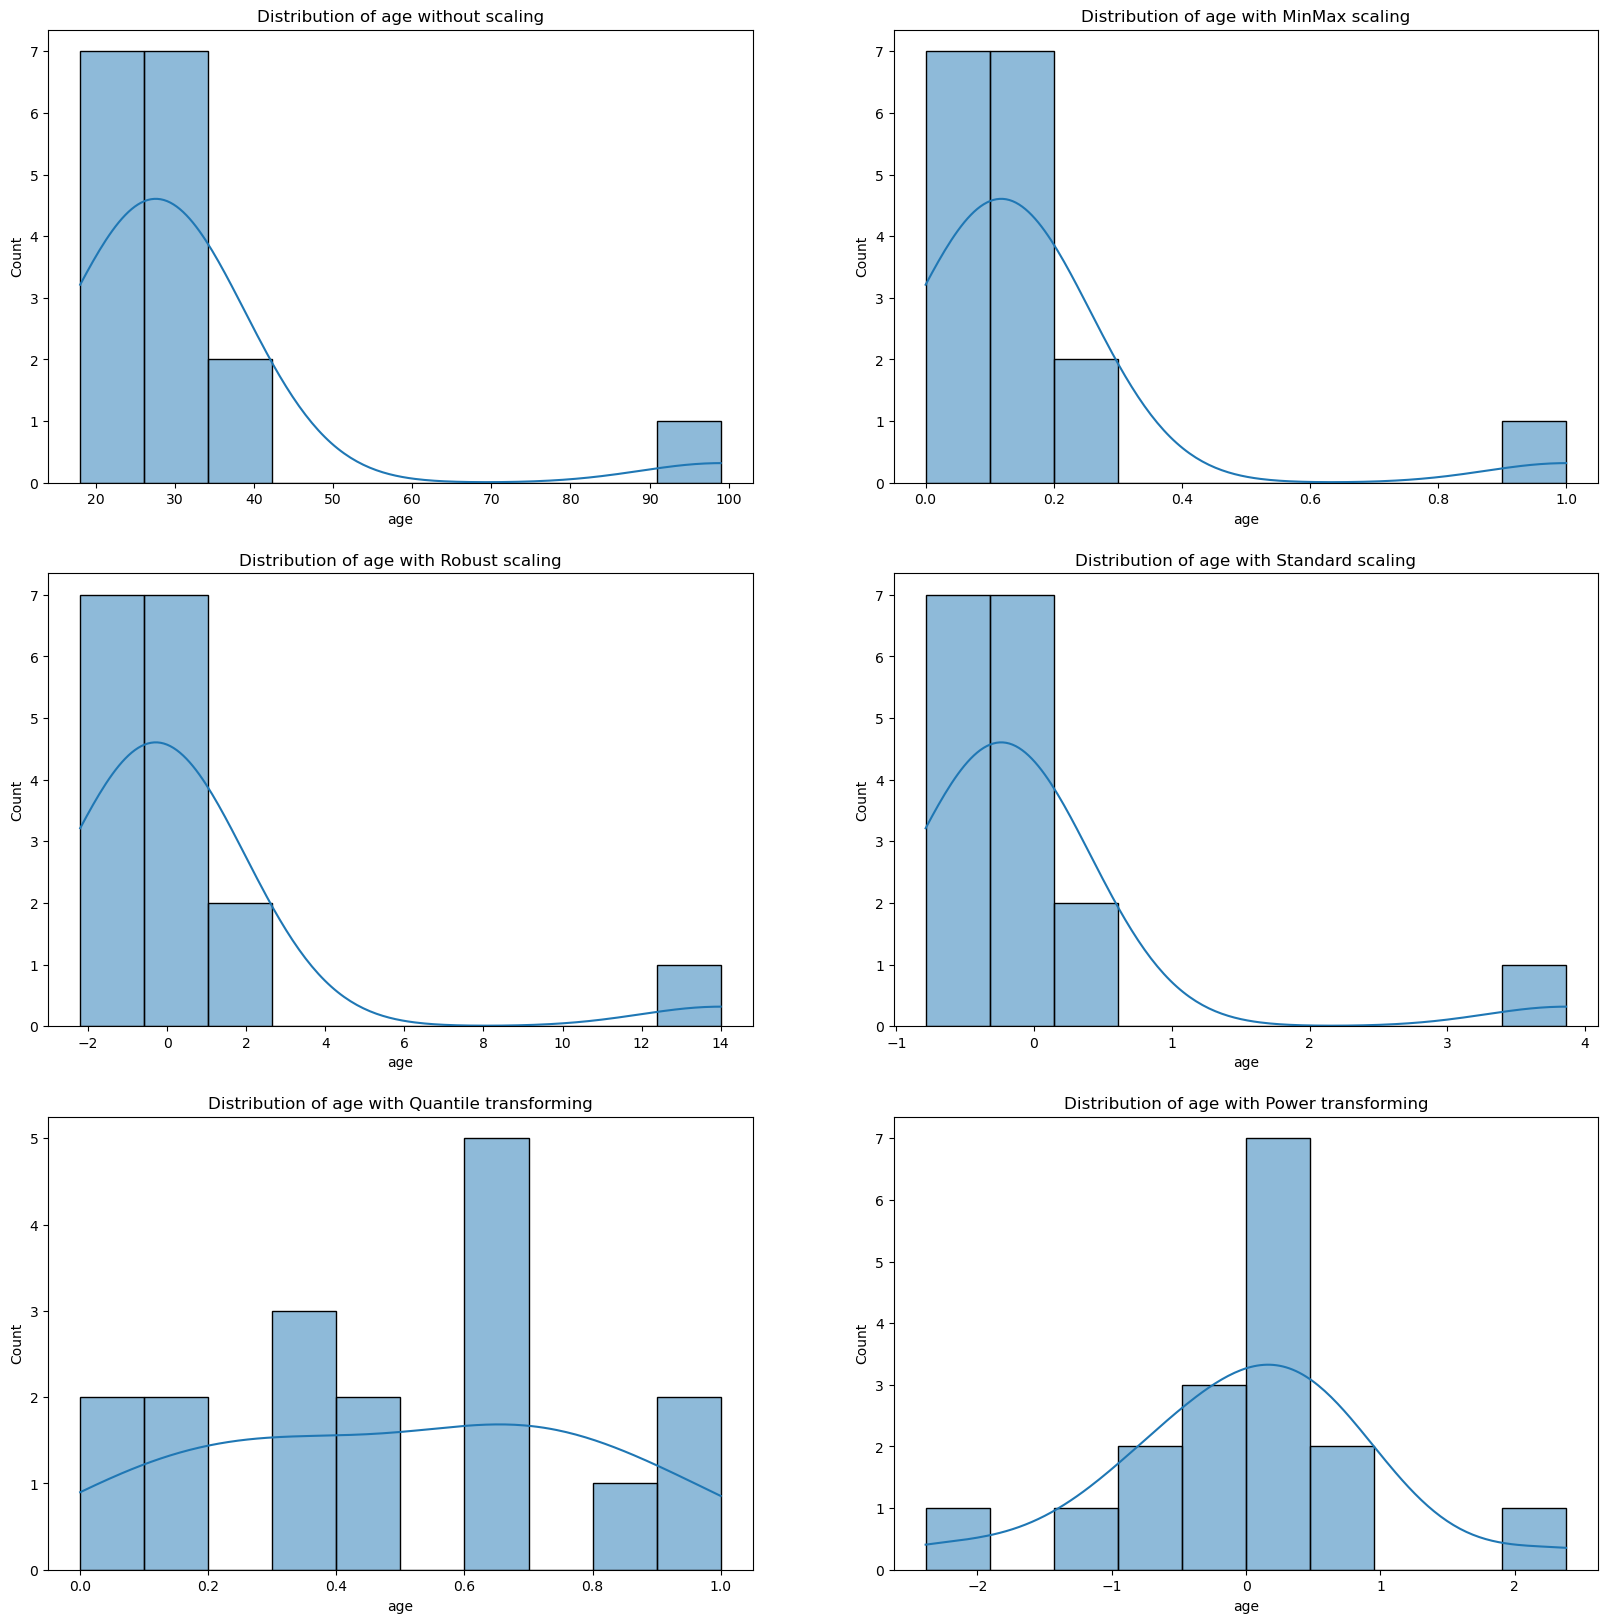

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.histplot(data=foods_df.iloc[:,-1], bins=10, kde=True, ax=ax[0, 0]);
sns.histplot(data=with_age_minmax.iloc[:,-1], bins=10, kde=True, ax=ax[0, 1]);
sns.histplot(data=with_age_robust.iloc[:,-1], bins=10, kde=True, ax=ax[1, 0]);
sns.histplot(data=with_age_standard.iloc[:,-1], bins=10, kde=True, ax=ax[1, 1]);
sns.histplot(data=with_age_quantile.iloc[:,-1], bins=10, kde=True, ax=ax[2, 0]);
sns.histplot(data=with_age_power.iloc[:,-1], bins=10, kde=True, ax=ax[2, 1]);

ax[0, 0].set_title('Distribution of age without scaling')
ax[0, 1].set_title('Distribution of age with MinMax scaling')
ax[1, 0].set_title('Distribution of age with Robust scaling')
ax[1, 1].set_title('Distribution of age with Standard scaling')
ax[2, 0].set_title('Distribution of age with Quantile transforming')
ax[2, 1].set_title('Distribution of age with Power transforming')

plt.show()

###5.2.&nbsp; All 6 heatmaps for comparison

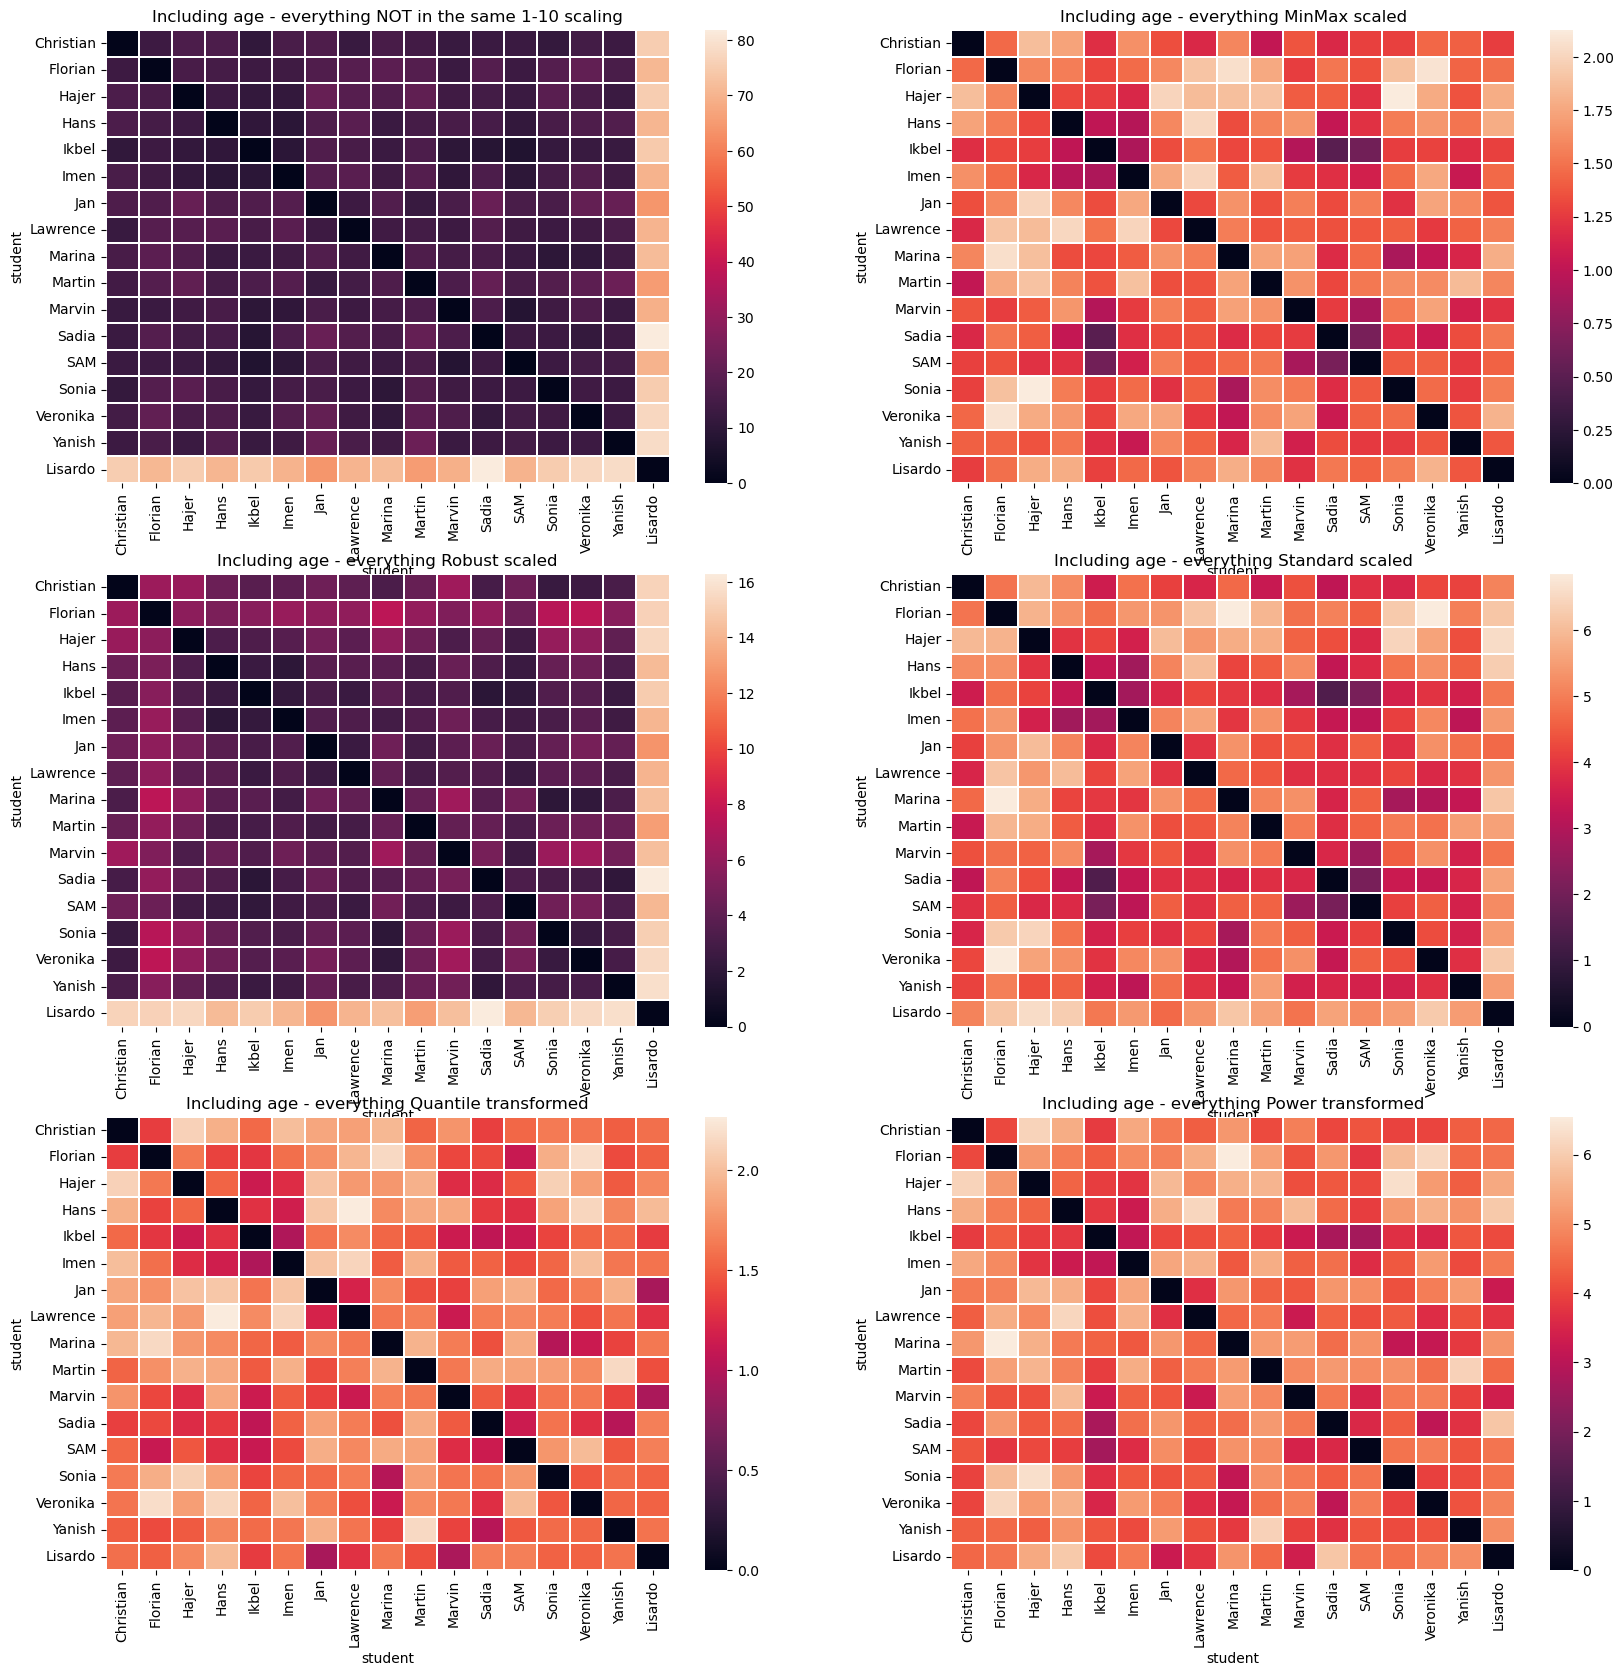

In [27]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.heatmap(with_age_distances_df, ax=ax[0, 0], linewidths=.2);
sns.heatmap(with_age_minmax_distances, ax=ax[0, 1], linewidths=.2);
sns.heatmap(with_age_robust_distances, ax=ax[1, 0], linewidths=.2);
sns.heatmap(with_age_standard_distances, ax=ax[1, 1], linewidths=.2);
sns.heatmap(with_age_quantile_distances, ax=ax[2, 0], linewidths=.2);
sns.heatmap(with_age_power_distances, ax=ax[2, 1], linewidths=.2);

ax[0, 0].set_title('Including age - everything NOT in the same 1-10 scaling')
ax[0, 1].set_title('Including age - everything MinMax scaled')
ax[1, 0].set_title('Including age - everything Robust scaled')
ax[1, 1].set_title('Including age - everything Standard scaled')
ax[2, 0].set_title('Including age - everything Quantile transformed')
ax[2, 1].set_title('Including age - everything Power transformed')

plt.show()

If you wish to explore further, [SKLearn: Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

---
##6.&nbsp; Challenge: apply this to the spotify dataset 😃
In a new notebook, try out the different scalers and transformers on the Spotify data and compare the results. Which scaler do you feel had the greatest impact? And, maybe, which scaler didn't help at all?

>With the carefully chosen 10 songs, you might not see a massive effect. But soon we'll start working with a Spotify dataset of 5000 songs, where scaling will have a much larger impact.

**If you finish early** and would like to learn more about scaling:
- [SKLearn: Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
- [SKLearn: Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)